In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')


In [13]:
N = 10000
d = 10
ads_selected = []
total_reward = 0


In [43]:
def random_policy():
    total_reward = 0
    for n in range(0, N):
        ad = random.randrange(d)
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        total_reward = total_reward + reward
    return ads_selected,total_reward

def ucb_bound():
    numbers_of_selections = [0] * d
    sums_of_rewards = [0] * d
    total_reward = 0
    for n in range(0, N):
        ad = 0
        max_upper_bound = 0
        for i in range(0, d):
            if(numbers_of_selections[i] > 0):
                average_reward = sums_of_rewards[i] / numbers_of_selections[i]  
                delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
                upper_bound = average_reward + delta_i 
            else:
                upper_bound = 1e400
            if(upper_bound > max_upper_bound):
                max_upper_bound = upper_bound
                ad = i
        ads_selected.append(ad)    
        numbers_of_selections[ad] = numbers_of_selections[ad] + 1   
        reward = dataset.values[n, ad]
        sums_of_rewards[ad] = sums_of_rewards[ad] + reward        
        total_reward = total_reward + reward        
    return ads_selected,total_reward
# Visualising the results

def plot_ad(ads_selected, reward):
    plt.hist(ads_selected)
    plt.title('Histogram of ads selections')
    plt.xlabel('Ads')
    plt.ylabel('Number of times each ad was selected')
    plt.show()
    print(reward)
    
    

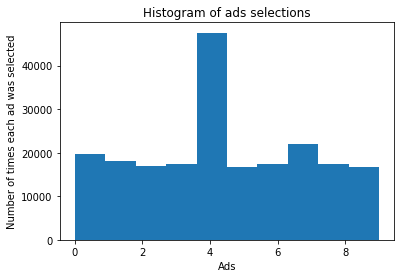

1238


In [44]:
ads_selected, reward= random_policy()
plot_ad(ads_selected,reward) 

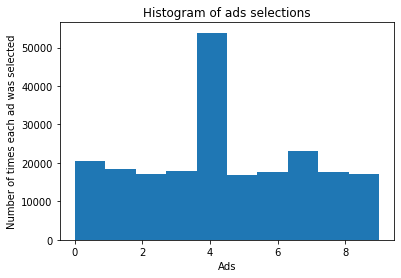

2178


In [45]:
ads_selected, reward= ucb_bound()
plot_ad(ads_selected,reward) 